# Central Limit Theorem


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load and plot the data

We will work with a distinctly non-normal data distribution - the scores for a large number of individuals on a 100-item political questionairre called BrexDex. 

The questions are designed and scored so that a high score overall score on the questionairre indicates an attitude agains Brexit, and a low score indicates an attitude in favour of Brexit.

Because the scores relate to a polarizing topic, the data distribution is bimodal

(These are made up data by the way!)

First load the data:

In [2]:
UKBrexdex=pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/UKBrexdex.csv')
UKBrexdex

,ID_code,score
0,186640,53
1,588140,90
2,977390,30
3,948470,42
4,564360,84
...,...,...
9995,851780,81
9996,698340,45
9997,693580,51
9998,872730,78


We can see that the dataset contains 10,000 individuals' scores on the BrexDex questionnaire. 

Let's plot them to get a sense of the distribution:

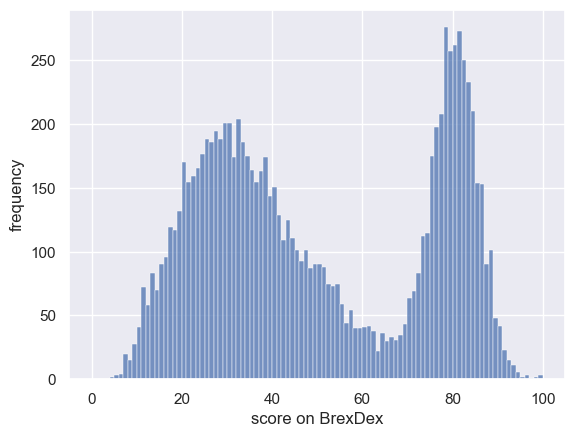

In [3]:
sns.histplot(UKBrexdex['score'], bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

Obviously, 10,000 is a very large sample (perhaps a national sample). We might be interested giving the questionnarie to a smaller group (say, 100 first year statistics students in Oxford) to see if their attitudes were similar to the larger national sample.

What kind of distribution of responses would we expect to get in a sample of 100?

### The sample distribution resembles the parent distribution

If the Oxford students have attitudes typical of the national sample, we could simulate what their data might look like by drawing a random sample of 100 from our national dataset.

We can do this using the tool <tt>numpy.random.choice</tt> which makes a random selection of datapoints from a larger dataset:

In [4]:
sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
print(sample)

[52 81 19 23 16 76 51 24 46 75 32 53 31 35 41 34 79 73 35 77 18 57 20 21
 32 37 49 78 51 16 46 28 48 24 29 59 16 93 31 32 52 41 32 81 83 43 21 35
 86 39 20 84 50 23 31 39 19 21 83 76 13 29 31 20 14 55 55 47 82 29 79  6
 31 40 41 29 70 86 13 88 22 69 83 16 70 78 57 20 22 81 36 22 42 26 43 33
 76 88 59 28]


Let's plot the data and compare to our national sample:

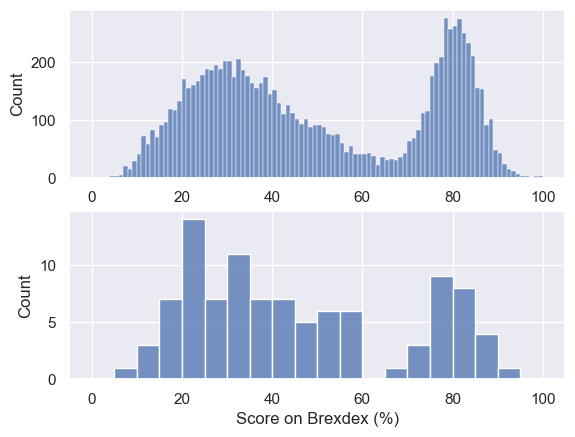

In [5]:
plt.subplot(2,1,1)
sns.histplot(UKBrexdex['score'], bins=range(101))
plt.subplot(2,1,2)
sns.histplot(sample, bins=range(0,101,5)) # use wider bins for the sample as there are fewer datapoints
plt.xlabel('Score on Brexdex (%)')
plt.show()

Hopefully we can see that the distribution within the sample resembles the shape of the distribution in the national sample, with two peaks, although somewhat noisier

Let's draw a few more random samples, each time of size 100, to check this:

/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels
/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels
/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


/var/folders/q4/twg1yll54y142rc02m5wwbt40000gr/T/ipykernel_32597/3173269395.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels


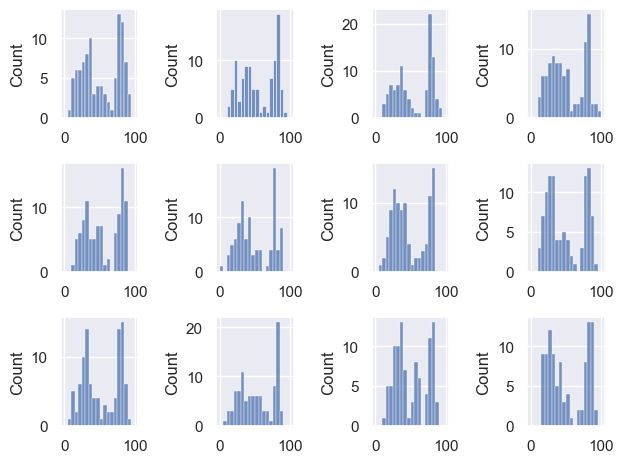

In [6]:
for i in range(1,13):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    plt.subplot(3,4,i)
    sns.histplot(sample, bins=range(0,101,5)) # use wider bins for the sample as there are fewer datapoints   
    plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels

Notice that we always manage to reproduce the bimodal shape, albeit with random variability. 

<b>The distribution within each sample resembles the parent distribution from which it is drawn, ie the UK national sample.</b>

# The sampling distribution of the mean

The mean Brexdex score can be obtained from the UK national sample as follows:

In [7]:
UKBrexdex['score'].mean()

49.8748

The mean score in the national sample is 49.9%.

Given that each of our smaller samples (with $n=100$) resemble the parent distribution, we might expect that the mean of each of these samples approximates the mean of the UK national sample.

Let's try drawing a large number of random samples with $n=100$, and getting the mean of each one:

In [8]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    m[i]=sample.mean()

Let's plot the resulting means:

Text(0.5, 0, 'sample mean')

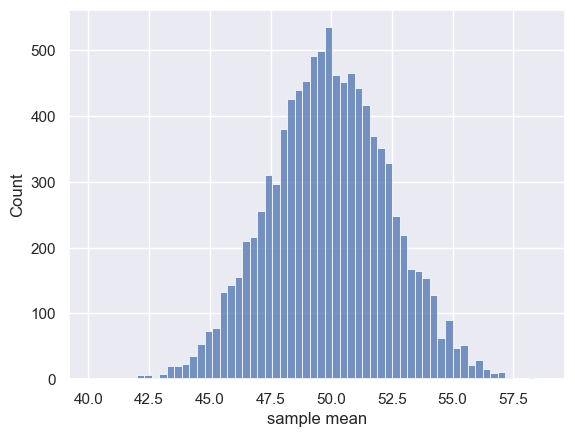

In [9]:
sns.histplot(m)
plt.xlabel('sample mean')

The distribution of sample means is approximately normal.

## Expected value of the mean

The expected value of the sample mean is simply the mean of the parent distribution. In other words, the means obtained from our 10,000 samples cluster around the mean of the UK national sample, which was 49.9.

In [10]:
m.mean() # get the mean of the 10,000 sample means

49.902620999999996

## Standard Error of the mean

Although the sample means group around the mean of the parent distrbution, there is some random variation, as some samples (by chance) contain higher Brexdex scores than others.

The variability of the sample means is quantified by the standard deviation of the sampling distribution of the mean (ie the sd of the data in the histogram above), which is about 2.46.

In [11]:
m.std()

2.4818769510914516

As we saw in the lecture, the standard deviation of the sampling distribution of the mean has a special name, the <b><i>standard error of the mean</i></b> or SEM, and is given by the formula:

$$ SEM = \frac{\sigma}{\sqrt{n}} $$

... where $\sigma$ is that standard deviation of the parent distribution, which in this case where we (unusually) have access to the UK national sample of 10000 individuals, we can obtain as follows:

In [12]:
UKBrexdex['score'].std()

24.792720561876358

Shall we check if the formula for the SEM gives us a match to the standard deviation of the sampling distribution of the mean?

In [13]:
print('sd of sampling distriution (from simulation) = ' + str(m.std()))

SEM = UKBrexdex['score'].std()/(n**0.5) # n to the power 0.5 is sqrt of n
print('SEM from the formula = ' + str(SEM))

sd of sampling distriution (from simulation) = 2.4818769510914516
SEM from the formula = 2.479272056187636


This is not a bad match!

## $SEM \propto \frac{1}{\sqrt{n}} $

The standard error of the mean is inversely proportional to $\sqrt{n}$

In other words, the random variability in sample means decreases as sample size $n$ increases - but in proportion to $\sqrt{n}$ not $n$ itself

We can see this if we construct the sampling distribution of the mean for samples of different sizes, say $n=50, 100, 1000$

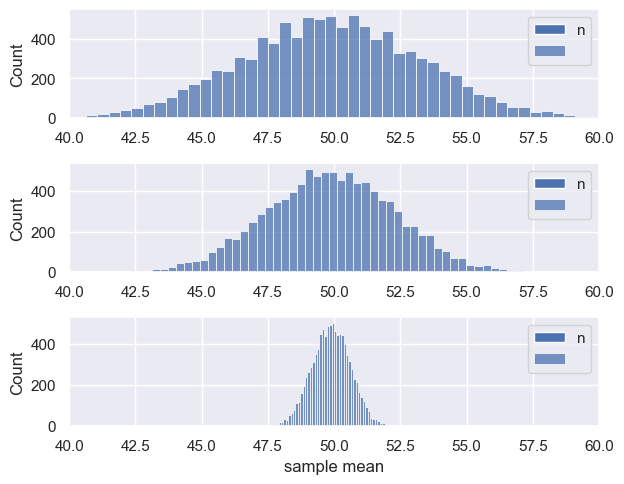

In [14]:
nSamples = 10000 # we will draw 10,000 samples
m=np.empty(nSamples) # make an array to store the means

nVals = [50,100,1000] # values of n to try

# this loop tries different values of n
for j in range(len(nVals)): 
    
    # this loop draws 10,000 samples of size n
    for i in range(nSamples):
        sample = np.random.choice(UKBrexdex['score'], nVals[j], replace=False)
        m[i]=sample.mean()
        
    # plot the distribution for each value of n
    plt.subplot(3,1,j+1)
    sns.histplot(m)
    plt.legend('n = ' + str(nVals[j]))
    plt.xlim([40,60])

plt.tight_layout()
plt.xlabel('sample mean')
plt.show()

## Normal Distribution

The <b>Central Limit Theorem</b> states that when $n$ is sufficiently large, the sampling distribution of the means of samples of size $n$ is a normal distribution, with a mean equivalent to the mean of the parent distribution, and a standard deviation equivalent to the SEM.

Let's check how well our sampling distribution for samples of size n=100 matches the predicted normal distribution.

First we regenerate our 10,000 samples of size 100:

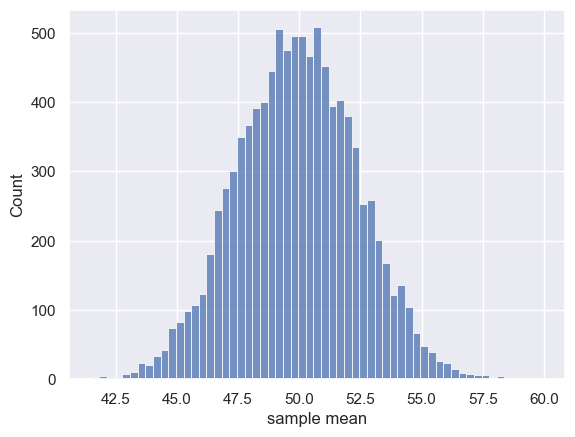

In [15]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], n, replace=False)
    m[i]=sample.mean()
    
sns.histplot(m)
plt.xlabel('sample mean')
plt.show()

Now we make our predicted normal sampling distribution of the mean.

Its mean $\mu$ should be the mean of the parent distribution:

In [16]:
mu = UKBrexdex['score'].mean()
print(mu)

49.8748


Its standard deviation should be the SEM: 

$$SEM = \frac{\sigma}{\sqrt{n}} $$

where $\sigma$ is the standard deviaition of the parent distribution:

In [17]:
SEM = UKBrexdex['score'].std()/(n**0.5)
print(SEM)

2.479272056187636


Then we obtain the PDF of the normal distribution $\mathcal{N}(\mu, SEM)$ for a suitable range of x-axis values (based on the histogram above):

[]

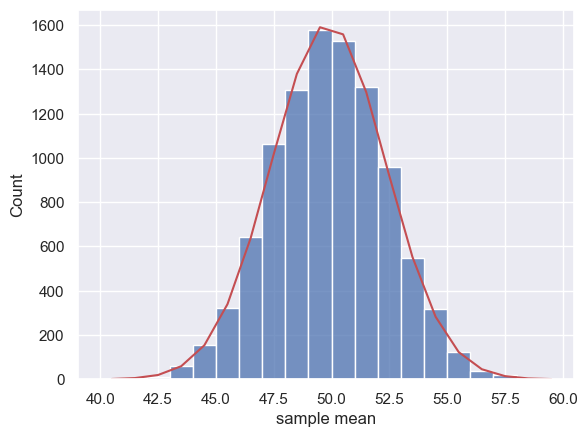

In [18]:
x = np.arange(40.5,60.5) # x axis values are from 40.5 to 60.5 (the .5 is to match the middle of the bars in the histogram)
p = stats.norm.pdf(x,mu,SEM) 
freq = p*nSamples # expected frequency of each sample mean is the probability of that sample mean, time total number of samples (10,000 in our example)

sns.histplot(m, bins=range(40,60))
plt.plot(x,freq,'r')
plt.xlabel('sample mean')
plt.plot()

This is not a bad match!

## How unusual is my sample mean?

Say we give the Brexdex questionnaire to 100 statistics undergraduates in Oxford, and their mean score is 55.1, as opposed to the mean in the UK national sample, 49.9. Can we infer that the students have different political attitude to the UK population as a whole?

The sampling distribution of the mean tells us the distribution of sample means we expect to get if we draw samples from the parent population (the UK national sample)

### Using the simulated sampling distribution of the mean

What proportion of sample means in our simulated sampling distribution exceeded 55.1?

In [19]:
# regenerate the sampling distribubtion
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    m[i]=sample.mean()
    
print('proportion of sample means greater than 55.1 = ' + str((m>55.1).mean()) +  ' or ' + str((m>55.1).mean()*100) + '%')

proportion of sample means greater than 55.1 = 0.0184 or 1.8399999999999999%


In other words, the mean Brexdex score of the students was high enough that we would expect it to occur less than 2% of the time for samples drawn from the UK national population - we might conclude that the political attitudes of the students differ from those of the population as a whole.

### Using the Normal distribution

We can ask how likely this mean was to have occurred under the assumption that the Oxford students have similar political attitudes to the population as a whole, using the CDF of the normal distribution:

In [20]:
mu = UKBrexdex['score'].mean()
SEM = UKBrexdex['score'].std()/(n**0.5)

p = 1-stats.norm.cdf(55.1,mu,SEM) 
print('proportion of sample means greater than 55.1 = ' + str(p) +  ' or ' + str(p*100) + '%')

proportion of sample means greater than 55.1 = 0.01753478848973844 or 1.753478848973844%


Hopefully this proportion agrees fairly well with the proportion of actual sample means exceeding 55.1 in the simulation